In [1]:
#Importing necessary libraries
import os
import pandas as pd
from pandas.io import sql
import datetime
import numpy as np
import seaborn as sns
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%time
nyc_data_green = pd.read_csv('green_tripdata_2022-01.csv')

CPU times: user 169 ms, sys: 32.3 ms, total: 201 ms
Wall time: 199 ms


In [3]:
%%time
nyc_data_yellow = pd.read_csv('yellow_tripdata_2022-01.csv',low_memory=False)

CPU times: user 6.35 s, sys: 739 ms, total: 7.09 s
Wall time: 7.09 s


## Dataset information |  size in MB ##

In [4]:
%%time
nyc_data_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62495 entries, 0 to 62494
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               62495 non-null  int64  
 1   lpep_pickup_datetime   62495 non-null  object 
 2   lpep_dropoff_datetime  62495 non-null  object 
 3   store_and_fwd_flag     56200 non-null  object 
 4   RatecodeID             56200 non-null  float64
 5   PULocationID           62495 non-null  int64  
 6   DOLocationID           62495 non-null  int64  
 7   passenger_count        56200 non-null  float64
 8   trip_distance          62495 non-null  float64
 9   fare_amount            62495 non-null  float64
 10  extra                  62495 non-null  float64
 11  mta_tax                62495 non-null  float64
 12  tip_amount             62495 non-null  float64
 13  tolls_amount           62495 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [5]:
nyc_data_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(11), int64(4), object(3)
memory usage: 338.4+ MB


In [6]:
#Getting the dimension of the dataset
nyc_data_green.shape

(62495, 20)

In [7]:
#Getting the dimension of the dataset
nyc_data_yellow.shape

(2463931, 18)

In [8]:
#Checking the data types
nyc_data_green.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [9]:
#Checking the data types
nyc_data_yellow.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

## Reduce dataset memory size ##

In [10]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [11]:
reduce_mem_usage(nyc_data_yellow)

Memory usage of dataframe is 338.37 MB
Memory usage after optimization is: 187.27 MB
Decreased by 44.7%


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.500000,3.0,0.5,3.650391,0.0,0.300049,21.950001,2.5
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.000000,0.5,0.5,4.000000,0.0,0.300049,13.300000,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.500000,0.5,0.5,1.759766,0.0,0.300049,10.560000,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.000000,0.5,0.5,0.000000,0.0,0.300049,11.800000,2.5
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.500000,0.5,0.5,3.000000,0.0,0.300049,30.299999,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,NaN,90,170,0,8.000000,0.0,0.5,2.390625,0.0,0.300049,13.690000,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,NaN,107,75,0,16.799999,0.0,0.5,4.351562,0.0,0.300049,24.450001,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,NaN,113,246,0,11.220000,0.0,0.5,2.000000,0.0,0.300049,16.520000,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,NaN,148,164,0,12.400000,0.0,0.5,0.000000,0.0,0.300049,15.700000,NaN


In [12]:
reduce_mem_usage(nyc_data_green)

Memory usage of dataframe is 9.54 MB
Memory usage after optimization is: 7.94 MB
Decreased by 16.8%


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.500000,0.50,0.5,0.000000,0.0,NaN,0.300049,4.800781,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.500000,0.50,0.5,0.000000,0.0,NaN,0.300049,10.796875,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.500000,3.25,0.5,4.601562,0.0,NaN,0.300049,23.156250,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.000000,0.50,0.5,0.000000,0.0,NaN,0.300049,9.296875,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.000000,0.50,0.5,5.210938,0.0,NaN,0.300049,31.265625,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,NaN,NaN,40,65,NaN,1.40,8.382812,0.00,0.0,1.929688,0.0,NaN,0.300049,10.609375,NaN,NaN,NaN
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,NaN,NaN,36,61,NaN,2.97,14.921875,0.00,0.0,0.000000,0.0,NaN,0.300049,15.218750,NaN,NaN,NaN
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,NaN,NaN,75,167,NaN,3.70,16.265625,0.00,0.0,0.000000,0.0,NaN,0.300049,16.562500,NaN,NaN,NaN
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,NaN,NaN,116,166,NaN,1.88,9.476562,0.00,0.0,2.169922,0.0,NaN,0.300049,11.953125,NaN,NaN,NaN


## Doing a few transformations. ##

- pickup and drop off time should be a datetime object
- store_and_fwd_flag should be categorical

In [13]:
#Transforming vendor_id and store_and_fwd to categorical data type
nyc_data_green['store_and_fwd_flag'] = nyc_data_green['store_and_fwd_flag'].astype('category')

In [14]:
#Transforming pick_up and drop off date time into a datetime object
nyc_data_green['lpep_pickup_datetime'] = pd.to_datetime(nyc_data_green['lpep_pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
nyc_data_green['lpep_dropoff_datetime'] = pd.to_datetime(nyc_data_green['lpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [15]:
#Transforming vendor_id and store_and_fwd to categorical data type
nyc_data_yellow['store_and_fwd_flag'] = nyc_data_green['store_and_fwd_flag'].astype('category')

In [16]:
# Transforming pick_up and drop off date time into a datetime object
nyc_data_yellow['pickup_datetime'] = pd.to_datetime(nyc_data_yellow['tpep_pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
nyc_data_yellow['dropoff_datetime'] = pd.to_datetime(nyc_data_yellow['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

## Visualize head and tail ##

In [17]:
%%time
nyc_data_yellow.head(10)

CPU times: user 234 µs, sys: 29 µs, total: 263 µs
Wall time: 278 µs


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_datetime,dropoff_datetime
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.650391,0.000000,0.300049,21.950001,2.5,2022-01-01 00:35:40,2022-01-01 00:53:29
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.000000,0.000000,0.300049,13.300000,0.0,2022-01-01 00:33:43,2022-01-01 00:42:07
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.759766,0.000000,0.300049,10.560000,0.0,2022-01-01 00:53:21,2022-01-01 01:02:19
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.000000,0.000000,0.300049,11.800000,2.5,2022-01-01 00:25:21,2022-01-01 00:35:23
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.000000,0.000000,0.300049,30.299999,2.5,2022-01-01 00:36:48,2022-01-01 01:14:20
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.30,1.0,N,138,161,1,33.0,3.0,0.5,13.000000,6.550781,0.300049,56.349998,2.5,2022-01-01 00:40:15,2022-01-01 01:09:48
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,17.0,0.5,0.5,5.199219,0.000000,0.300049,26.000000,2.5,2022-01-01 00:20:50,2022-01-01 00:34:58
7,2,2022-01-01 00:13:04,2022-01-01 00:22:45,1.0,2.02,1.0,N,238,152,2,9.0,0.5,0.5,0.000000,0.000000,0.300049,12.800000,2.5,2022-01-01 00:13:04,2022-01-01 00:22:45
8,2,2022-01-01 00:30:02,2022-01-01 00:44:49,1.0,2.71,1.0,N,166,236,1,12.0,0.5,0.5,2.250000,0.000000,0.300049,18.049999,2.5,2022-01-01 00:30:02,2022-01-01 00:44:49
9,2,2022-01-01 00:48:52,2022-01-01 00:53:28,1.0,0.78,1.0,N,236,141,2,5.0,0.5,0.5,0.000000,0.000000,0.300049,8.800000,2.5,2022-01-01 00:48:52,2022-01-01 00:53:28


In [18]:
nyc_data_yellow.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_datetime,dropoff_datetime
2463921,2,2022-01-31 23:36:07,2022-01-31 23:48:05,NaN,3.04,NaN,NaN,158,261,0,13.090000,0.0,0.5,3.529297,0.0,0.300049,19.920000,NaN,2022-01-31 23:36:07,2022-01-31 23:48:05
2463922,2,2022-01-31 23:09:46,2022-01-31 23:20:50,NaN,2.42,NaN,NaN,233,79,0,10.970000,0.0,0.5,2.289062,0.0,0.300049,16.559999,NaN,2022-01-31 23:09:46,2022-01-31 23:20:50
2463923,2,2022-01-31 23:51:47,2022-02-01 00:10:07,NaN,7.51,NaN,NaN,246,116,0,26.730000,0.0,0.5,6.558594,0.0,0.300049,36.590000,NaN,2022-01-31 23:51:47,2022-02-01 00:10:07
2463924,2,2022-01-31 23:49:00,2022-02-01 00:08:00,NaN,8.50,NaN,NaN,18,75,0,25.410000,0.0,0.5,0.000000,0.0,0.300049,26.209999,NaN,2022-01-31 23:49:00,2022-02-01 00:08:00
2463925,2,2022-01-31 23:02:51,2022-01-31 23:13:54,NaN,1.63,NaN,NaN,224,90,0,9.710000,0.0,0.5,2.769531,0.0,0.300049,15.780000,NaN,2022-01-31 23:02:51,2022-01-31 23:13:54
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,NaN,90,170,0,8.000000,0.0,0.5,2.390625,0.0,0.300049,13.690000,NaN,2022-01-31 23:36:53,2022-01-31 23:42:51
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,NaN,107,75,0,16.799999,0.0,0.5,4.351562,0.0,0.300049,24.450001,NaN,2022-01-31 23:44:22,2022-01-31 23:55:01
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,NaN,113,246,0,11.220000,0.0,0.5,2.000000,0.0,0.300049,16.520000,NaN,2022-01-31 23:39:00,2022-01-31 23:50:00
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,NaN,148,164,0,12.400000,0.0,0.5,0.000000,0.0,0.300049,15.700000,NaN,2022-01-31 23:36:42,2022-01-31 23:48:45
2463930,2,2022-01-31 23:46:00,2022-02-01 00:13:00,NaN,8.94,NaN,NaN,186,181,0,25.480000,0.0,0.5,6.281250,0.0,0.300049,35.060001,NaN,2022-01-31 23:46:00,2022-02-01 00:13:00


In [19]:
nyc_data_green.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.000000,0.0,NaN,0.300049,4.800781,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.000000,0.0,NaN,0.300049,10.796875,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.601562,0.0,NaN,0.300049,23.156250,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.000000,0.0,NaN,0.300049,9.296875,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.210938,0.0,NaN,0.300049,31.265625,1.0,1.0,2.75
5,1,2022-01-01 00:47:57,2022-01-01 00:54:09,N,1.0,150,210,1.0,1.30,7.0,0.50,0.5,0.000000,0.0,NaN,0.300049,8.296875,2.0,1.0,0.00
6,2,2022-01-01 00:13:38,2022-01-01 00:33:50,N,1.0,66,67,1.0,6.47,22.5,0.50,0.5,0.000000,0.0,NaN,0.300049,23.796875,2.0,1.0,0.00
7,2,2022-01-01 00:43:00,2022-01-01 00:49:20,N,1.0,40,195,1.0,1.15,6.0,0.50,0.5,0.000000,0.0,NaN,0.300049,7.300781,2.0,1.0,0.00
8,2,2022-01-01 00:41:04,2022-01-01 00:47:04,N,1.0,112,80,1.0,1.30,6.0,0.50,0.5,0.000000,0.0,NaN,0.300049,7.300781,2.0,1.0,0.00
9,2,2022-01-01 00:51:07,2022-01-01 01:09:31,N,1.0,256,186,1.0,4.75,17.0,0.50,0.5,4.210938,0.0,NaN,0.300049,25.265625,1.0,1.0,2.75


In [20]:
nyc_data_green.tail(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
62485,2,2022-01-31 22:01:00,2022-01-31 22:13:00,NaN,NaN,244,151,NaN,4.69,19.015625,0.0,0.0,4.121094,0.0,NaN,0.300049,26.187500,NaN,NaN,NaN
62486,2,2022-01-31 22:54:00,2022-01-31 23:10:00,NaN,NaN,25,188,NaN,3.12,13.898438,0.0,0.0,3.160156,0.0,NaN,0.300049,17.359375,NaN,NaN,NaN
62487,2,2022-01-31 23:23:00,2022-01-31 23:39:00,NaN,NaN,179,112,NaN,3.80,16.484375,0.0,0.0,3.730469,0.0,NaN,0.300049,20.515625,NaN,NaN,NaN
62488,2,2022-01-31 23:50:00,2022-02-01 00:11:00,NaN,NaN,112,239,NaN,6.04,23.453125,0.0,0.0,5.828125,0.0,NaN,0.300049,32.343750,NaN,NaN,NaN
62489,2,2022-01-31 23:19:00,2022-01-31 23:37:00,NaN,NaN,152,233,NaN,6.71,25.406250,0.0,0.0,6.269531,0.0,NaN,0.300049,34.718750,NaN,NaN,NaN
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,NaN,NaN,40,65,NaN,1.40,8.382812,0.0,0.0,1.929688,0.0,NaN,0.300049,10.609375,NaN,NaN,NaN
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,NaN,NaN,36,61,NaN,2.97,14.921875,0.0,0.0,0.000000,0.0,NaN,0.300049,15.218750,NaN,NaN,NaN
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,NaN,NaN,75,167,NaN,3.70,16.265625,0.0,0.0,0.000000,0.0,NaN,0.300049,16.562500,NaN,NaN,NaN
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,NaN,NaN,116,166,NaN,1.88,9.476562,0.0,0.0,2.169922,0.0,NaN,0.300049,11.953125,NaN,NaN,NaN
62494,2,2022-01-31 23:52:00,2022-02-01 00:26:00,NaN,NaN,225,179,NaN,9.60,32.187500,0.0,0.0,7.230469,10.0,NaN,0.300049,49.718750,NaN,NaN,NaN


## visualize NAN values ##

CPU times: user 17.7 s, sys: 1.16 s, total: 18.8 s
Wall time: 18.6 s


<AxesSubplot:>

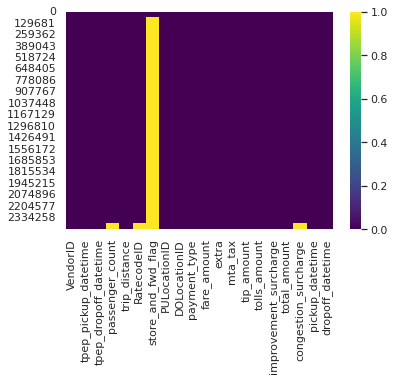

In [21]:
%%time
sns.heatmap(nyc_data_yellow.isnull(), cmap='viridis')

<AxesSubplot:>

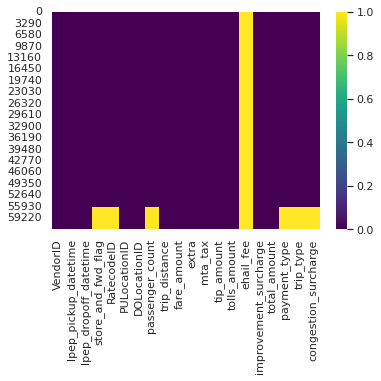

In [22]:
sns.heatmap(nyc_data_green.isnull(), cmap='viridis')

## Verify for missing values ##

In [23]:
def chk_missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    df_mz = pd.concat([mis_val, mis_val_percent], axis=1)
    df_mz = df_mz.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    df_mz['Total Missing Values'] = df_mz['Missing Values']
    df_mz['% Total Missing Values'] = 100 * df_mz['Total Missing Values'] / len(df)
    df_mz['Data Type'] = df.dtypes
    df_mz = df_mz[df_mz.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("\nThe dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
           "\nThere are " + str(df_mz.shape[0]) +" columns that have missing values.")
    return df_mz

In [24]:
%%time
chk_missing_values(nyc_data_yellow)


The dataframe has 20 columns and 2463931 Rows.

There are 4 columns that have missing values.
CPU times: user 310 ms, sys: 23.5 ms, total: 333 ms
Wall time: 337 ms


,Missing Values,% of Total Values,Total Missing Values,% Total Missing Values,Data Type
store_and_fwd_flag,2407731,97.7,2407731,97.7,category
passenger_count,71503,2.9,71503,2.9,float16
RatecodeID,71503,2.9,71503,2.9,float16
congestion_surcharge,71503,2.9,71503,2.9,float16


In [25]:
%%time
chk_missing_values(nyc_data_green)


The dataframe has 20 columns and 62495 Rows.

There are 7 columns that have missing values.
CPU times: user 22 ms, sys: 7.35 ms, total: 29.4 ms
Wall time: 27.1 ms


,Missing Values,% of Total Values,Total Missing Values,% Total Missing Values,Data Type
ehail_fee,62495,100.0,62495,100.0,float64
store_and_fwd_flag,6295,10.1,6295,10.1,category
RatecodeID,6295,10.1,6295,10.1,float16
passenger_count,6295,10.1,6295,10.1,float16
payment_type,6295,10.1,6295,10.1,float16
trip_type,6295,10.1,6295,10.1,float16
congestion_surcharge,6295,10.1,6295,10.1,float16


In [26]:
# Drop column with 100% null values
df_green = nyc_data_green.drop(['ehail_fee'], axis=1)

## Check and remove duplicates ##

In [27]:
%%time
df_green.duplicated().sum()

CPU times: user 56.5 ms, sys: 381 µs, total: 56.9 ms
Wall time: 55.1 ms


0

In [28]:
%%time
nyc_data_yellow.duplicated().sum()

CPU times: user 4.29 s, sys: 428 ms, total: 4.72 s
Wall time: 4.71 s


0

In [29]:
%%time
df_green= df_green[~df_green.duplicated()]

CPU times: user 66.1 ms, sys: 8.18 ms, total: 74.3 ms
Wall time: 72.9 ms


In [30]:
%%time
df_yellow= nyc_data_yellow[~nyc_data_yellow.duplicated()]

CPU times: user 3.69 s, sys: 387 ms, total: 4.07 s
Wall time: 4.07 s


## Perform EDA ##

In [31]:
df_yellow.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2463931.0,1.707819,0.502137,1.000000,1.000000,2.000000,2.000000,6.000000
passenger_count,2392428.0,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,9.000000
trip_distance,2463931.0,5.372752,547.871399,0.000000,1.040000,1.740000,3.130000,306159.281250
RatecodeID,2392428.0,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,2463931.0,166.076809,65.468057,1.000000,132.000000,162.000000,234.000000,265.000000
DOLocationID,2463931.0,163.580716,70.790159,1.000000,113.000000,162.000000,236.000000,265.000000
payment_type,2463931.0,1.194449,0.500178,0.000000,1.000000,1.000000,1.000000,5.000000
fare_amount,2463931.0,12.946486,255.814896,-480.000000,6.500000,9.000000,14.000000,401092.312500
extra,2463931.0,NaN,0.000000,-4.500000,0.000000,0.500000,2.500000,33.500000
mta_tax,2463931.0,NaN,0.000000,-0.500000,0.500000,0.500000,0.500000,16.593750


In [32]:
df_green.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,62495.0,1.849508,0.357556,1.000000,2.000000,2.000000,2.000000,2.000000
RatecodeID,56200.0,inf,0.862305,1.000000,1.000000,1.000000,1.000000,5.000000
PULocationID,62495.0,97.615041,62.987311,1.000000,55.000000,75.000000,130.000000,265.000000
DOLocationID,62495.0,135.969902,77.590956,1.000000,74.000000,137.000000,215.000000,265.000000
passenger_count,56200.0,inf,0.877930,0.000000,1.000000,1.000000,1.000000,8.000000
trip_distance,62495.0,77.758636,2909.354004,0.000000,1.080000,1.900000,3.500000,224481.375000
fare_amount,62495.0,inf,inf,-65.000000,7.000000,10.500000,17.000000,604.500000
extra,62495.0,0.347412,0.657715,-4.500000,0.000000,0.000000,0.500000,4.500000
mta_tax,62495.0,0.426270,0.181396,-0.500000,0.500000,0.500000,0.500000,0.500000
tip_amount,62495.0,inf,2.484375,-0.859863,0.000000,1.000000,2.609375,76.750000


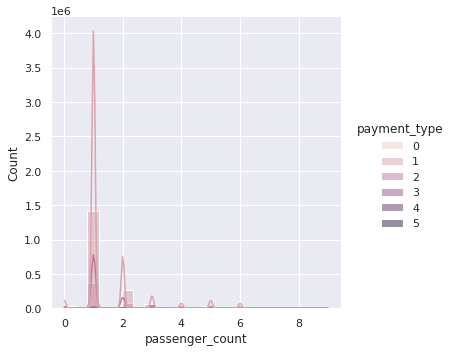

In [33]:
# Data distribution of the dataset.
sns.displot(data=df_yellow, x="passenger_count", kde=True, hue="payment_type")

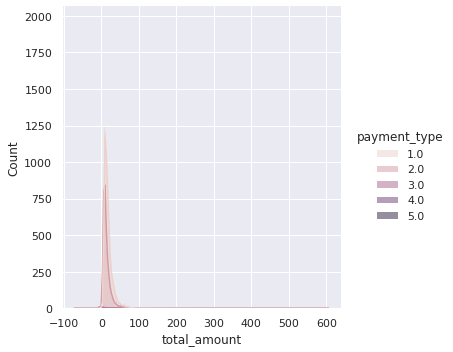

In [34]:
# Data diatribution of the dataset.
sns.displot(data=df_green, x="total_amount", kde=True, hue="payment_type")

In [35]:
#Checking the duration of time the dataset was collected
df_green['lpep_pickup_datetime'].min(), df_green['lpep_pickup_datetime'].max()

(Timestamp('2009-01-01 00:34:01'), Timestamp('2022-01-31 23:57:37'))

In [36]:
df_green['lpep_dropoff_datetime'].min(), df_green['lpep_dropoff_datetime'].max()

(Timestamp('2009-01-01 17:05:20'), Timestamp('2022-02-01 21:01:54'))

In [37]:
df_yellow['pickup_datetime'].min(), df_yellow['pickup_datetime'].max()

(Timestamp('2008-12-31 22:23:09'), Timestamp('2022-05-18 20:41:57'))

In [38]:
df_yellow['dropoff_datetime'].min(), df_yellow['dropoff_datetime'].max()

(Timestamp('2008-12-31 23:06:56'), Timestamp('2022-05-18 20:47:45'))

In [39]:
#Create a hour column to determine which hour the taxi business is busy
df_green['pickup_hour'] = df_green['lpep_pickup_datetime'].dt.hour

In [40]:
df_yellow['pickup_hour'] = df_yellow['pickup_datetime'].dt.hour

In [41]:
df_green['pickup_time_of_the_day'] = df_green.pickup_hour.apply(lambda y: (y % 24 + 4)//4).replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Afternoon',
                      5: 'Evening',
                      6: 'Night'})

In [42]:
df_yellow['pickup_time_of_the_day'] = df_yellow.pickup_hour.apply(lambda y: (y % 24 + 4)//4).replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Afternoon',
                      5: 'Evening',
                      6: 'Night'})

### Check what times of the day are busy ###

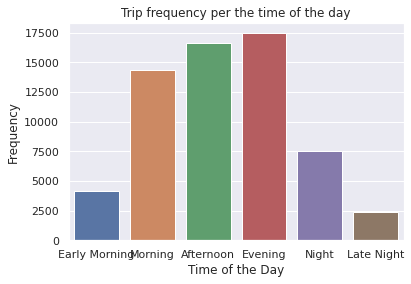

In [44]:
sns.countplot(x = 'pickup_time_of_the_day', order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'],
              data=df_green);
plt.title("Trip frequency per the time of the day");
plt.xlabel("Time of the Day");
plt.ylabel("Frequency");

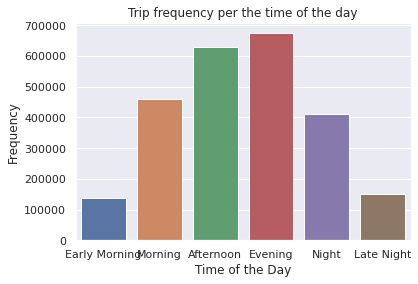

In [45]:
sns.countplot(x = 'pickup_time_of_the_day', order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'],
              data=df_yellow);
plt.title("Trip frequency per the time of the day");
plt.xlabel("Time of the Day");
plt.ylabel("Frequency");

## Check which days of the week are busy ##

In [46]:
df_yellow['pickup_day_of_the_week'] = df_yellow.pickup_datetime.apply(lambda x: x.day_name())

In [49]:
df_green['pickup_day_of_the_week'] = df_green.lpep_pickup_datetime.apply(lambda x: x.day_name())

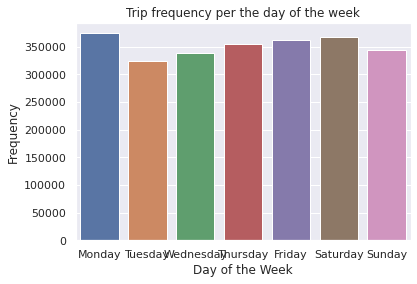

In [50]:
sns.countplot(x = 'pickup_day_of_the_week', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              data=df_yellow);
plt.title("Trip frequency per the day of the week");
plt.xlabel("Day of the Week");
plt.ylabel("Frequency");

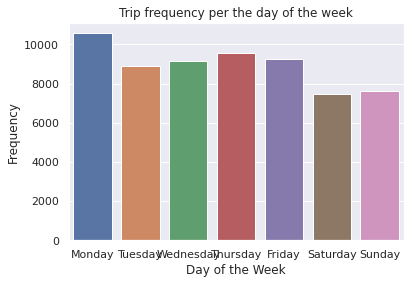

In [51]:
sns.countplot(x = 'pickup_day_of_the_week', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              data=df_green);
plt.title("Trip frequency per the day of the week");
plt.xlabel("Day of the Week");
plt.ylabel("Frequency");

In [ ]:
# df = (pd.concat([df1, df2], ignore_index=True, sort =False).drop_duplicates(['type','date'], keep='last'))